## Ocean Cleanup Evaluation Model

#In this document, first we did some data manipulation which makes the original data set better to analyze, then we did some visulization and some pre analysis which guide us to choose models and variables, finally we used multi-linear model, random forest model and catboosting model to realize our evaluation model. Besides we also made some time series analysis for years after 2016 to study the change of ocean garbage density with time.

##Data manipulation

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, add_dummy_feature
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_excel("/content/drive/My Drive/Data_Level5_BAH_OceanCleanup.xlsx") 

In [48]:
datacsv=pd.read_csv("/content/drive/My Drive/Data_Level5_BAH_OceanCleanup (1).csv") 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
from datetime import datetime, date, timedelta, timezone

In [0]:
datatime=data.drop(37903) #no total number

In [51]:
datatime['Cleanup Date'][18882]=datetime(2018,4,20)  #Correction for input mistake

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
for i in range(len(datatime)):
  datatime['Cleanup Date'][i].strftime("%Y/%m/%d")

In [53]:
datatime[datatime['Cleanup Date']>datetime(2020,2,22)].index     #Clean time in the future.

Int64Index([1432, 7673, 11730, 12917, 16671, 16672, 16936, 20907, 31904,
            34907],
           dtype='int64')

In [0]:
datanew=datatime.drop([1432, 7673, 11730, 12917, 16671, 16672, 16936, 20907, 31904,
            34907],axis=0)

In [0]:
databalabala=datanew.sort_values(by='Cleanup Date')

In [0]:
datafinal=databalabala.reset_index()
datafinal=datafinal.drop('index',axis=1)

In [0]:
datafinal['size']=1  # Initialize the size, which has the same meaning with people, while easy to do the classification

In [58]:
for i in range(len(datafinal)):
  if datafinal['People'][i]<=10:
    datafinal['size'][i]=1
  if datafinal['People'][i]>10 and datafinal['People'][i]<=50:
    datafinal['size'][i]=2
  if datafinal['People'][i]>50:
    datafinal['size'][i]=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
datafinal['year']=1 #Extraction for year

In [60]:
for i in range(len(datafinal)):
  datafinal['year'][i]=datafinal['Cleanup Date'][i].year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
activetime=datafinal.groupby('year')['size'].sum() #active score by year
activeloc=datafinal.groupby('State')['size'].sum() #active score by State

In [0]:
import seaborn as sns

In [0]:
#3
temp=datafinal['GPS'][1].split(",")

In [64]:
for i in range(len(datafinal)):
  datafinal['GPS'][i]=datafinal['GPS'][i].split(",")  #turn the GPS data into latitude and longitude

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
datafinal['longi']=1 
datafinal['lati']=1  

In [66]:
for i in range(len(datafinal)):
  datafinal['longi'][i]=float(datafinal['GPS'][i][1])
  datafinal['lati'][i]=float(datafinal['GPS'][i][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
datafinal['density']=np.log(datafinal['Total Items Collected']/datafinal['Miles']+0.001)  #Denfine our denpendent variable

In [0]:
datadensity=datafinal.dropna()

In [0]:
datadensity=datadensity.reset_index().drop('index',axis=1)

In [0]:
east=datadensity[datadensity['longi']>=-100] #Eastern Coast, PS:include part of texas

In [0]:
west=datadensity[datadensity['longi']<-100] #Western Coast, PS:include part of texas

In [0]:
east=east.sort_values(by='lati').reset_index().drop('index',axis=1)

In [0]:
west=west.sort_values(by='lati').reset_index().drop('index',axis=1)

In [0]:
datafinal['People']=np.log(datafinal['People']+0.001)  # Turn the original data into log value, which can decrease the effect of the outliers
datafinal['Pounds']=np.log(datafinal['Pounds']+0.001)
datafinal['Miles']=np.log(datafinal['Miles']+0.001)
datafinal['Total Items Collected']=np.log(datafinal['Total Items Collected']+0.001)
datafinal=datafinal.dropna()
datafinal['Adults']=np.log(datafinal['Adults']+0.001)
datafinal['Children']=np.log(datafinal['Children']+0.001)
datafinal['recycle']=datafinal['# of bags']+datafinal['Bottle Caps (Metal)']+datafinal['Paper Bags']+datafinal['Cups, Plates (Paper)']+datafinal['Cups, Plates (Foam)']+datafinal['6-Pack Holders']+datafinal['Tobacco Packaging/Wrap']+datafinal['Other Packaging (Clean Swell)']+datafinal['Appliances (refrigerators, washers, etc.)']+datafinal['Tires']+datafinal['Toys']+datafinal['Foam Pieces']+datafinal['Glass Pieces']
datafinal['else']=datafinal['Cigarette Butts']+datafinal['Food Wrappers (candy, chips, etc.)']+datafinal['Take Out/Away Containers (Plastic)']+datafinal['Take Out/Away Containers (Foam)']+datafinal['Straws, Stirrers']+datafinal[ 'Forks, Knives, Spoons']+datafinal['Beverage Bottles (Glass)']+datafinal['Beverage Cans']+datafinal['Fishing Buoys, Pots & Traps']+datafinal['Fishing Net & Pieces']+datafinal['Fishing Line (1 yard/meter = 1 piece)']+datafinal['Rope (1 yard/meter = 1 piece)']+datafinal['Fishing Gear (Clean Swell)']+datafinal['Balloons']+datafinal['Cigar Tips']+datafinal['Other Trash (Clean Swell)']+datafinal['Diapers']+datafinal['Tampons/Tampon Applicators']+datafinal['Personal Hygiene (Clean Swell)']
datafinal['plastic']=datafinal['Bottle Caps (Plastic)']+datafinal['Lids (Plastic)']+datafinal['Beverage Bottles (Plastic)']+datafinal['Grocery Bags (Plastic)']+datafinal['Other Plastic Bags']+datafinal['Cups, Plates (Plastic)']+datafinal['Other Plastic/Foam Packaging']+datafinal['Other Plastic Bottles (oil, bleach, etc.)']+datafinal['Strapping Bands']+datafinal['Condoms']+datafinal['Plastic Pieces']
datafinal['toxic']=datafinal['Cigarette Lighters']+datafinal['Construction Materials']+datafinal['Fireworks']+datafinal['Syringes']
datafinal['recycle']=np.log(datafinal['recycle']+0.01)
datafinal['else']=np.log(datafinal['else']+0.01)
datafinal['plastic']=np.log(datafinal['plastic']+0.01)
datafinal['toxic']=np.log(datafinal['toxic']+0.01)

##Pre Analysis

In [0]:
#(2) To figure out the relationship between the four types of trash
gather=datafinal[datafinal['Miles']<=0.05] # make sure they appear at the same place

In [0]:
gather=gather[['plastic','else','toxic','recycle']]

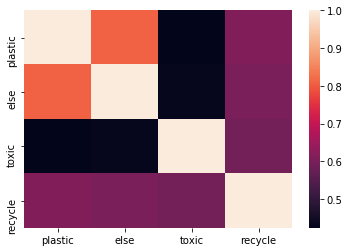

In [150]:
sns.heatmap(gather.corr())

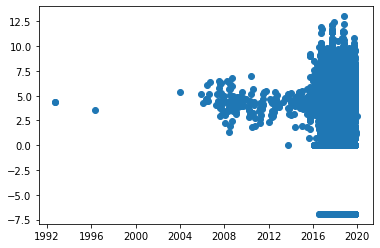

In [76]:
plt.scatter(datafinal['Cleanup Date'],datafinal['Total Items Collected']) 

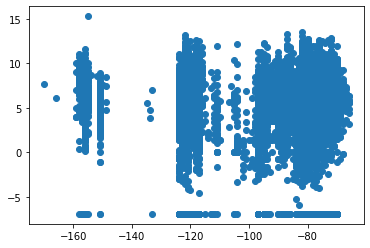

In [77]:
plt.scatter(datafinal['longi'],datafinal['density'])

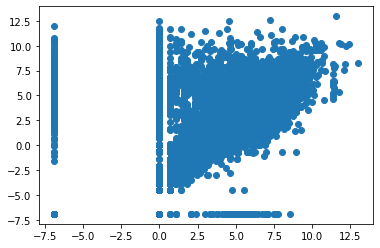

In [78]:
plt.scatter(datafinal['Total Items Collected'],datafinal['Pounds'])  

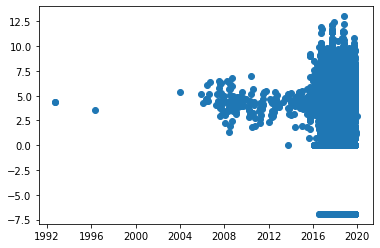

In [79]:
plt.scatter(datafinal['Cleanup Date'],datafinal['Total Items Collected'])  #west, according to the plot, the latitude between 25 adn 40 is the most serious area, except one special area close to 60

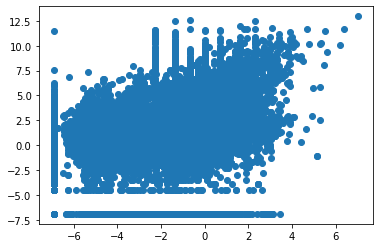

In [80]:
plt.scatter(datafinal['Miles'],datafinal['Pounds'])  #west, according to the plot, the latitude between 25 adn 40 is the most serious area, except one special area close to 60

In [0]:
layer=datafinal[['Cleanup Type','Total Items Collected','longi','lati','size']]

In [0]:
import plotly.express as px

In [0]:
layer=datafinal[['Cleanup Type','Total Items Collected','longi','lati','size']]

In [89]:
fig = px.scatter_3d(layer, x='longi', y='Cleanup Type', z='Total Items Collected',color='size')  # Most trash is found in land and the size 3 has a qualitative change in 'Total Items Collected' compared to the other 2 sizes.
fig.show()

In [90]:
layer=datafinal[['Cleanup Type','Total Items Collected','plastic','recycle','toxic','size']]
fig = px.scatter_3d(layer, x='Cleanup Type', y='plastic', z='recycle',color='toxic')       # Show the relation ship between different kinds of trash, usually they are positive related
fig.show()

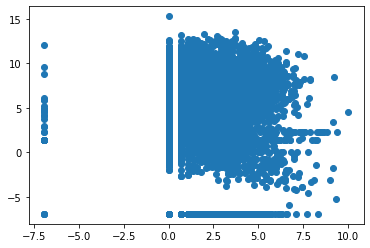

In [91]:
plt.scatter((datafinal['People']),(datafinal['density']))

##Model Establishment

In [0]:
#machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, add_dummy_feature
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale

In [0]:
datafinal['east']=1*(datafinal['longi']>=-100)

##data split

In [0]:
datafinal=datafinal.replace([np.inf, -np.inf], np.nan).dropna()

In [0]:
X_var_names=['Children','People','recycle','plastic','toxic','east','Pounds','Miles']

In [0]:
Y1_var_names=['density']
Y2_var_cames=['Total Items Collected']

In [0]:
X=datafinal[X_var_names]
y1 = datafinal[Y1_var_names]
y2= datafinal[Y2_var_cames]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, shuffle=True,random_state=1)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.3, shuffle=True,random_state=1)   #In case to choose Total Items Collected

## Multilinear

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, add_dummy_feature
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.feature_selection import f_regression

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



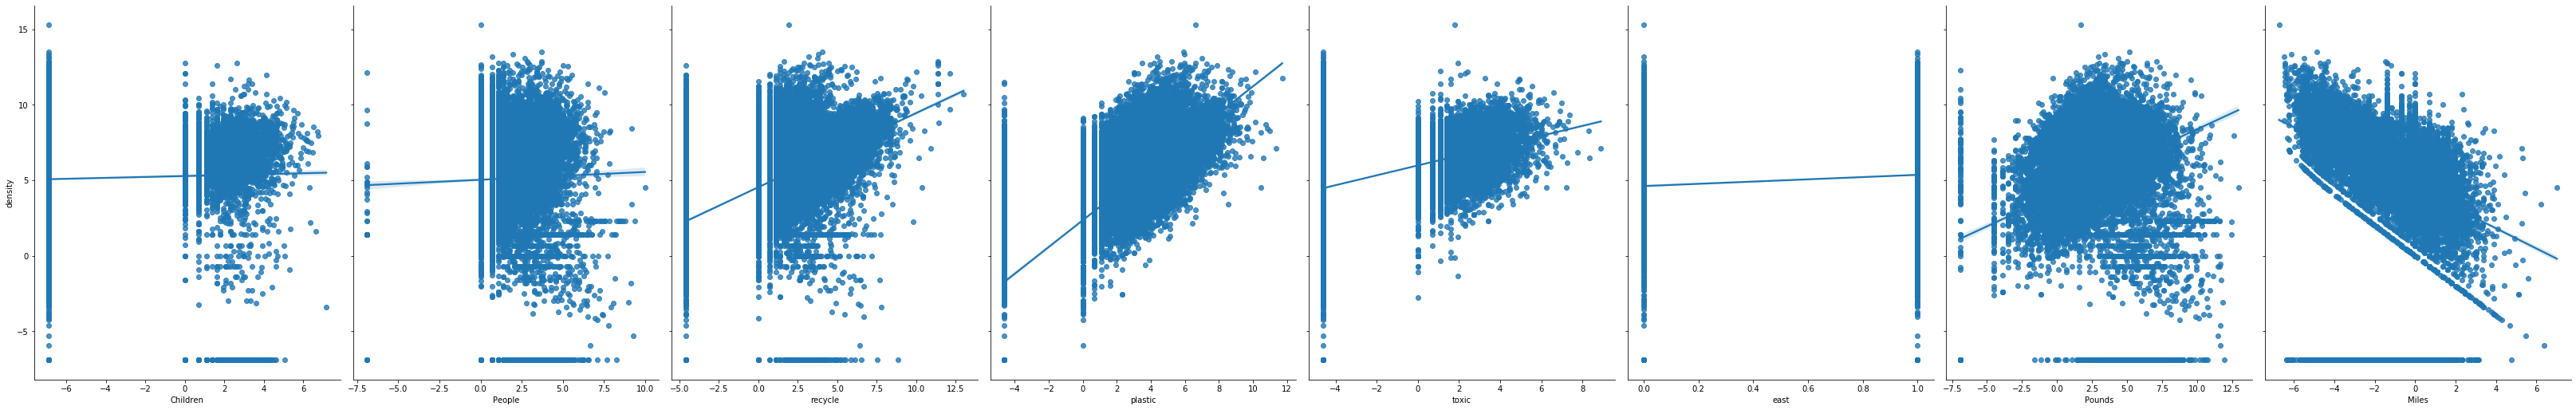

In [108]:
sns.pairplot(datafinal, x_vars=X_var_names, y_vars='density', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()   # Obvious linear relationship

In [0]:
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt

In [151]:
model1 = smf.ols(formula='density~Children+ People+recycle+plastic+toxic+east+Pounds+Miles', data=datafinal).fit(cov_type='HC1') 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     9012.
Date:                Fri, 28 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:23:16   Log-Likelihood:                -46130.
No. Observations:               24571   AIC:                         9.228e+04
Df Residuals:                   24562   BIC:                         9.235e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0309      0.053     19.283      0.000       0.926       1.136
Children      -0.0280      0.004     -7.174      0.000      -0.036      -0.020
People        -0.2697      0.012    -22.579      0.000      -0.293      -0.246
recycle        0.1059      0.006     19.208      0.000       0.095       0.117
plastic        0.8142      0.009     89.250      0.000       0.796       0.832
toxic          0.0094      0.005      1.916      0.055      -0.000       0.019
east           0.0267      0.022      1.192      0.233      -0.017       0.071
Pounds         0.3093      0.010     31.685      0.000       0.290       0.328
Miles         -1.0357      0.006   -172.932      0.000      -1.047      -1.024
==============================================================================
Omnibus:                     3529.604   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47621.403
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       9.809   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [158]:
(y_test-y_pred).max() # Benchmark

density    9.140263
dtype: float64

In [159]:
(y_test-y_pred).min()

density   -10.473524
dtype: float64

In [152]:
regr = LinearRegression() # Since there is no overfitting, so no CV.
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
r2_ols = cross_val_score(regr, X_train, y_train, cv=5,scoring='r2').mean()
print("R2 score in-sample is",r2_ols)
r2_ols1= r2_score(y_test, y_pred)
print("R2 score out-of-sample is",r2_ols1)
mse_ols = -cross_val_score(regr, X_train, y_train, cv=5,scoring='neg_mean_squared_error').mean()
print("MSE score in-sample is",mse_ols)
mse_ols1 = mean_squared_error(y_test,y_pred)
print("MSE score out-of-sample is",mse_ols1)
print("RMSE score in-sample is",np.sqrt(mse_ols))
print("RMSE score out-of-sample is",np.sqrt(mse_ols1))
#score part

R2 score in-sample is 0.8237889535648305
R2 score out-of-sample is 0.8051155645275859
MSE score in-sample is 2.4858743869224553
MSE score out-of-sample is 2.508845434746096
RMSE score in-sample is 1.5766655913422019
RMSE score out-of-sample is 1.5839335323005495


## Lasso

In [112]:
lassocv = LassoCV(alphas=np.logspace(-5,2,15))
lassocv.fit(X_train, y_train)
mse_= -cross_val_score(lassocv, X_train, y_train, cv=5,scoring='neg_mean_squared_error').mean()
print('In Sample Test set MSE of rf: {:.5f}'.format(mse_))
rmse1=np.sqrt(mse_)
print('In Sample Test set RMSE of rf: {:.2f}'.format(rmse1))
r21 = cross_val_score(lassocv, X_train, y_train, cv=5,scoring='r2').mean()
print('In Sample Test set R2 of rf: {:.5f}'.format(r21))

mse_lasso = mean_squared_error(y_test, lassocv.predict(X_test))
print('Out of Sample Test set MSE of rf: {:.5f}'.format(mse_lasso))
rmse=np.sqrt(mse_lasso)
print('Out of Sample Test set RMSE of rf: {:.2f}'.format(rmse))
r2 = r2_score(y_test, lassocv.predict(X_test))
print('Out of Sample Test set R2 of rf: {:.5f}'.format(r2))
print('alpha',lassocv.alpha_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/l

In Sample Test set MSE of rf: 2.51074
In Sample Test set RMSE of rf: 1.58


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In Sample Test set R2 of rf: 0.82078
Out of Sample Test set MSE of rf: 2.50315
Out of Sample Test set RMSE of rf: 1.58
Out of Sample Test set R2 of rf: 0.80556
alpha 0.01


In [113]:
pd.Series(lassocv.coef_, index=X.columns)  # Feature Selection-getting rid of the "east" variable

Children   -0.032706
People     -0.274258
recycle     0.104363
plastic     0.825385
toxic       0.011657
east        0.000000
Pounds      0.308885
Miles      -1.029177
dtype: float64

## RANDOM FOREST

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed

Text(0.5, 1.0, ' ')

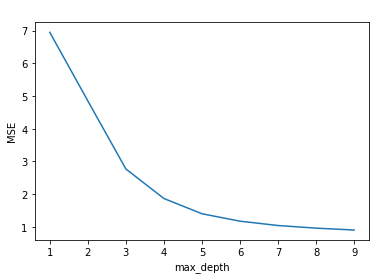

In [114]:
from sklearn.ensemble import RandomForestRegressor 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, shuffle=True,random_state=1)# validation part, ignore the time effect

max_depth=list(range(1,10))
MSE=[]

for a in max_depth:
  rfg=RandomForestRegressor(max_depth=a, random_state=5)
  rfg.fit(X_train,y_train)
  y_pred=rfg.predict(X_valid)# to get rid of overfitting, using test
  MSE.append(mean_squared_error(y_valid,y_pred))

ax = plt.gca()
ax.plot(max_depth, MSE)

plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title(' ')

In [0]:
# CHOOSE THE DEPTH EQUAL TO 9

In [160]:
rfg=RandomForestRegressor(max_depth=9, random_state=5) # We set the max_depth to 3
rfg.fit(X_train,y_train)
y_pred=rfg.predict(X_valid)
print('mean square error train set', mean_squared_error(y_valid,y_pred))
print('valid R square', rfg.score(X_valid,y_valid))
print('root mean square error test set', np.sqrt(mean_squared_error(y_valid,y_pred)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



mean square error train set 0.9029455718165599
valid R square 0.9336522645712653
root mean square error test set 0.9502344825444717


In [161]:
y_pred=rfg.predict(X_test)
print('mean square error test set',mean_squared_error(y_test,y_pred) )
print('test R square', rfg.score(X_test,y_test))
print('root mean square error test set', np.sqrt(mean_squared_error(y_test, y_pred)))


mean square error test set 0.8748797908649303
test R square 0.932040271677322
root mean square error test set 0.9353500900010275


In [167]:
(np.array(y_test)-y_pred).max() #Benchmark

20.08838756639724

In [168]:
(np.array(y_test)-y_pred).min()

-19.34717540483326

In [118]:
importance=list(rfg.feature_importances_)
column=list(datafinal[X_var_names].columns[:])
importance_features=pd.DataFrame(column)
importance_features['importance']=importance
sorts=importance_features.sort_values(by='importance',ascending=True)
sorts.reset_index().drop('index',axis=1)

0  importance
0      east    0.003378
1  Children    0.004184
2     toxic    0.004401
3    People    0.011428
4   recycle    0.024647
5    Pounds    0.081157
6     Miles    0.196827
7   plastic    0.673978

## Time effect

In [0]:
#Just 4 years, too small, we turn the data in 2016 and after to monthly data , which is easier to analyze.

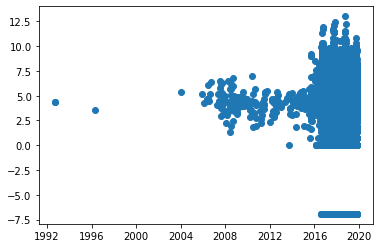

In [120]:
plt.scatter(datafinal['Cleanup Date'],datafinal['Total Items Collected'])  

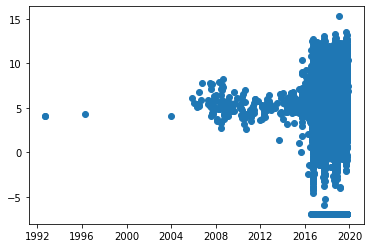

In [121]:
plt.scatter(datafinal['Cleanup Date'],datafinal['density'])  

In [0]:
data2016=datafinal[datafinal['year']>=2016]

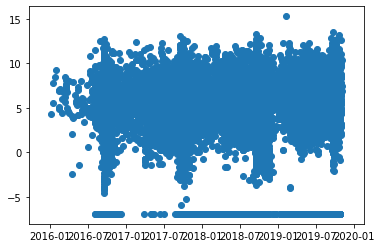

In [123]:
plt.scatter(data2016['Cleanup Date'],data2016['density'])  

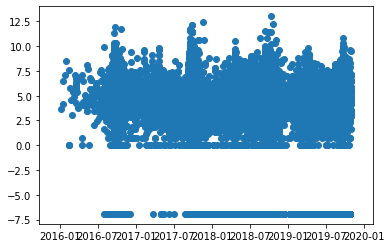

In [124]:
plt.scatter(data2016['Cleanup Date'],data2016['Total Items Collected']) #seasonality using HC1 in linear,here doing ARIMA for time series analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
df=data2016[['density','Cleanup Date']]
df.set_index('Cleanup Date',inplace=True)

In [0]:
df=df.reset_index()

In [0]:
df=df.groupby('Cleanup Date').mean()

In [0]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

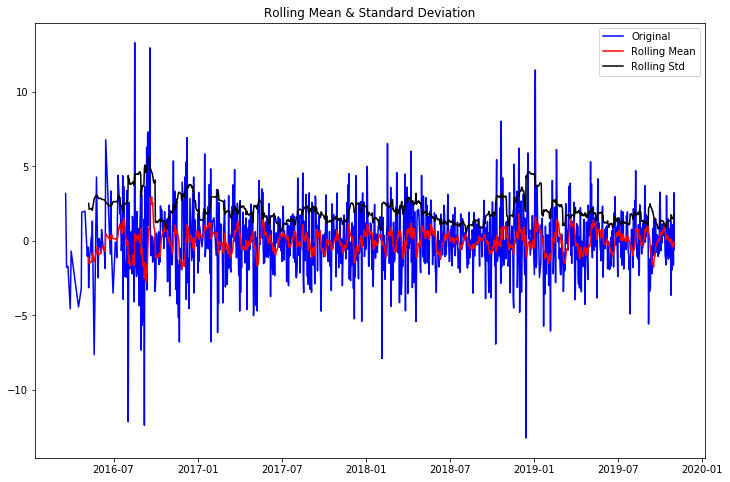

Results of Dickey-Fuller Test:
Test Statistic                -1.186863e+01
p-value                        6.583826e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.173000e+03
Critical Value (1%)           -3.435937e+00
Critical Value (5%)           -2.864007e+00
Critical Value (10%)          -2.568084e+00
dtype: float64


In [130]:
#take density as an example
df['log_seasonal_difference'] = df - df.shift(12)  
test_stationarity(df.log_seasonal_difference.dropna(inplace=False))

stationary

In [0]:
start = datetime.datetime.strptime("2019-12-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future])

In [132]:
mod = sm.tsa.statespace.SARIMAX(df.density, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 Statespace Model Results                                 
Dep. Variable:                            density   No. Observations:                 1221
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -2635.594
Date:                            Fri, 28 Feb 2020   AIC                           5275.187
Time:                                    16:00:00   BIC                           5285.381
Sample:                                         0   HQIC                          5279.026
                                           - 1221                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9979      0.138     -7.244      0.000      -1.268      -0.728
sigma2         4.5963      0.626   

In [133]:
pred=results.get_prediction(start=pd.to_datetime('2019-10-30'), dynamic=False)  #Prediction till 2020-11-01,which is the average density across the country.

pred_ci = pred.conf_int()
pred_ci

lower density  upper density
2019-10-30       2.797056      11.234539
2019-10-31       1.711105      10.148589
2019-11-01       4.993564      13.431047
2019-12-01       2.668208      11.105691
2020-01-01       1.183581      13.115984
2020-02-01      -0.322921      14.291228
2020-03-01      -1.535304      15.339662
2020-04-01      -2.682693      16.183911
2020-05-01      -3.577857      17.089339
2020-06-01      -4.246993      18.076027
2020-07-01      -5.116718      18.747513
2020-08-01      -5.864457      19.447314
2020-09-01      -6.358134      20.322758
2020-10-01      -7.326875      20.656231
2020-11-01      -7.659055      21.568303

In [0]:
df['forecast']=results.predict(start=1209,dynamic=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



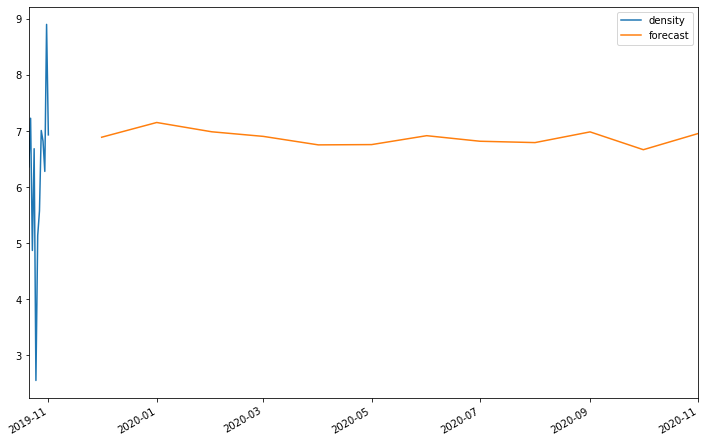

In [135]:
df[['density', 'forecast']].ix[-24:].plot(figsize=(12, 8)) 

##Geographic Effect

In [0]:
#no big differnce for lati and longi

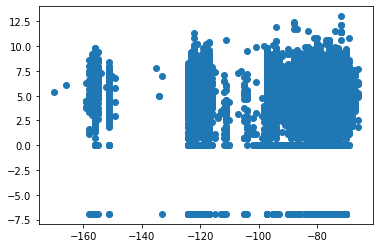

In [137]:
plt.scatter(datafinal['longi'],datafinal['Total Items Collected'])  

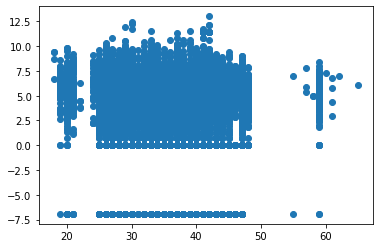

In [138]:
plt.scatter(datafinal['lati'],datafinal['Total Items Collected'])  

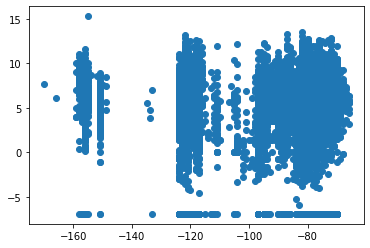

In [139]:
plt.scatter(datafinal['longi'],datafinal['density'])  

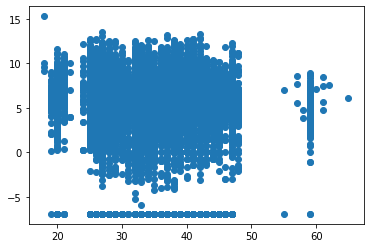

In [140]:
plt.scatter(datafinal['lati'],datafinal['density'])  

##Boosting Methods: Catboost

In [141]:
pip install catboost # Another method for evaluation which is not so appropriate.

     |████████████████████████████████| 64.0MB 72kB/s 


In [0]:
from  catboost  import CatBoostRegressor

In [0]:
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')

In [144]:
model.fit(X_train, y_train)
mse_= -cross_val_score(model, X_train, y_train, cv=5,scoring='neg_mean_squared_error').mean()
print('In Sample Test set MSE of rf: {:.5f}'.format(mse_))
rmse1=np.sqrt(mse_)
print('In Sample Test set RMSE of rf: {:.2f}'.format(rmse1))
r21 = cross_val_score(model, X_train, y_train, cv=5,scoring='r2').mean()
print('In Sample Test set R2 of rf: {:.5f}'.format(r21))

mse = mean_squared_error(y_test, model.predict(X_test))
print('Out of Sample Test set MSE of rf: {:.5f}'.format(mse))
rmse=np.sqrt(mse)
print('Out of Sample Test set RMSE of rf: {:.2f}'.format(rmse))
r2 = r2_score(y_test, model.predict(X_test))
print('Out of Sample Test set R2 of rf: {:.5f}'.format(r2))


0:	learn: 2.4345698	total: 49.5ms	remaining: 49.5ms
1:	learn: 2.0895973	total: 52.1ms	remaining: 0us
0:	learn: 2.5117062	total: 2.37ms	remaining: 2.37ms
1:	learn: 2.0497687	total: 4.16ms	remaining: 0us
0:	learn: 2.5045956	total: 2.3ms	remaining: 2.3ms
1:	learn: 2.0556363	total: 4.39ms	remaining: 0us
0:	learn: 2.4975057	total: 2.11ms	remaining: 2.11ms
1:	learn: 2.0411625	total: 3.94ms	remaining: 0us
0:	learn: 2.5076911	total: 4.2ms	remaining: 4.2ms
1:	learn: 2.0607847	total: 7.81ms	remaining: 0us
0:	learn: 2.5039609	total: 2.24ms	remaining: 2.24ms
1:	learn: 2.0524561	total: 4.16ms	remaining: 0us
In Sample Test set MSE of rf: 4.23721
In Sample Test set RMSE of rf: 2.06
0:	learn: 2.5117062	total: 2.41ms	remaining: 2.41ms
1:	learn: 2.0497687	total: 4.48ms	remaining: 0us
0:	learn: 2.5045956	total: 3.74ms	remaining: 3.74ms
1:	learn: 2.0556363	total: 7.53ms	remaining: 0us
0:	learn: 2.4975057	total: 2.04ms	remaining: 2.04ms
1:	learn: 2.0411625	total: 4.23ms	remaining: 0us
0:	learn: 2.5076911	t